<a href="https://colab.research.google.com/github/RioAccountant/06-CNN-Image-Recognition/blob/main/11_24_Project_6_Image_Classi_w_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Image Classification with Deep Learning



This project introduces us to deep learning. The deep learning process is a huge leap forward in data science and the field is less than 15 years old. The processing is significantly different from our previous projects so you will basically be provided a walkthrough document delineating the steps - much like Project 1. Deep learning is fascinating and I just want you to go through the process so you can appreciate its power.



The data collection portion of deep learning projects is a rather complex task. In other words, there is no CSV file that we can load to serve as our training data. Constructing a training data set is a rather large undertaking. We have imported all the training images (took hours) and I will show you how you can load the training data through the "pickle" process.



There are three files in this data set:
- [the feature set]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle ), i.e. images of dogs and cats ( mostly )
- [the target set]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle ), i.e. the indicator if something is a dog or cat ( mostly )
- [a test image]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg )





This project will classify new, unseen images of cats and dogs. This was one of the first big success stories of deep learning and we will go through the process of building a learning algorithm that will do this task. Telling a picture of a cat from a picture of a dog is easy for humans to do, but had been notoriously difficult to get a computer learning to perform well on the task. Deep learning solved that.


The same data set, but you can copy the links by viewing the markdown directly to bypass Google Colab's annoying "You are leaving Colab" link.




https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg


**ALERT!!! Be sure to enable the BPU runtime processing-1 GPU sessino at a time per day-see top right enable GPU and change runtime-must say GPU

##Problem Definition/Exercise Objective: build & train a model to recognize an image of a dog, cat, or other based on a training/testing set of photos that have been pickled.

###Type of Model to be employed will be a Supervised Classification Model using Convolutional Neuro Network (CNN) to enable pattern, shape and edge detection within image file(s).

##Relative to processing/data collection: x.pickle & y.pickle  have already been configured (serialized into a NP array); however we need to scale the MIN & MAX.

##For the EDA phase, make sure we run Tensor ranks and plot a few in advance using a random sample (n=100, 1000).

##Then the regular train, test split process (possibly wrapping in a f(s))

##Finally, we will introduce a new and unintroduced picture and test it.

##Load the requisite libraries and tools

In [ ]:
import numpy as np #for multi-dim array provided
import pandas as pd #for data manipulation

import random

#Pickle is native to Python for saving/loading a trained model to Python using serialized data to be packed/unpacked
import pickle

#Keras, an artificial NN lib as agent to interface to TensorFlow
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model


#Tensorflow-dataflow prog. lib to facilitate work w/NN's
import tensorflow.keras as keras
import tensorflow as tf
import tensorflow.keras.layers as layers

#To enable algorithms & other utilities (MIN/MAX scaling needed for project modeling)
from sklearn import datasets
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#For plotting 2D charts & plots
import matplotlib.pyplot as plt

In [ ]:
url_X = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'

url_y = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

url_1 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

In [ ]:
#Confirm connection to X
!curl -O https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  237M  100  237M    0     0  48.5M      0  0:00:04  0:00:04 --:--:-- 53.5M


In [ ]:
#Check the data type/shape: 24K elements, 100pix hxw, & grayscale
X_pickle = pd.read_pickle(url_X)
print(type(X_pickle))
X_pickle.shape


<class 'numpy.ndarray'>


(24946, 100, 100, 1)

In [ ]:
#Confirm connection to y
!curl -O https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49948  100 49948    0     0   223k      0 --:--:-- --:--:-- --:--:--  223k


In [ ]:
#Confirm that y converts to array & check the shape
y_pickle= np.array(pd.read_pickle(url_y))
print(type(y_pickle))
y_pickle.shape

<class 'numpy.ndarray'>


(24946,)

##Pickle the files to working directory

In [ ]:
with open('X_pickle', 'wb') as file:
     pickle.dump(X_pickle, file)

In [ ]:
with open('y_pickle', 'wb') as file:
    pickle.dump(y_pickle, file)

In [ ]:
!ls -la
#how to delete the extras that came in through curl???

total 487496
drwxr-xr-x 1 root root      4096 Nov 25 19:12 .
drwxr-xr-x 1 root root      4096 Nov 25 19:11 ..
drwxr-xr-x 4 root root      4096 Nov 22 14:22 .config
drwxr-xr-x 1 root root      4096 Nov 22 14:23 sample_data
-rw-r--r-- 1 root root 249460166 Nov 25 19:12 X.pickle
-rw-r--r-- 1 root root 249460167 Nov 25 19:12 X_pickle
-rw-r--r-- 1 root root     49948 Nov 25 19:12 y.pickle
-rw-r--r-- 1 root root    199728 Nov 25 19:12 y_pickle


##Read in the Pickled file(s): Load the data

In [ ]:
with open('X_pickle', 'rb') as file:
     data_read = pickle.load(file)
data_read


array([[[[ 95],
         [ 94],
         [ 98],
         ...,
         [170],
         [172],
         [171]],

        [[ 92],
         [ 91],
         [ 95],
         ...,
         [170],
         [172],
         [171]],

        [[ 89],
         [ 91],
         [ 92],
         ...,
         [165],
         [169],
         [169]],

        ...,

        [[ 84],
         [ 76],
         [ 73],
         ...,
         [135],
         [164],
         [154]],

        [[ 82],
         [ 79],
         [ 71],
         ...,
         [142],
         [134],
         [153]],

        [[ 80],
         [ 85],
         [ 85],
         ...,
         [151],
         [146],
         [138]]],


       [[[171],
         [154],
         [139],
         ...,
         [185],
         [187],
         [188]],

        [[146],
         [140],
         [129],
         ...,
         [187],
         [187],
         [188]],

        [[128],
         [132],
         [128],
         ...,
         [186],
         [

In [ ]:
 with open('y_pickle', 'rb') as file:
     data_read = pickle.load(file)
 data_read

array([0, 1, 1, ..., 1, 0, 1])

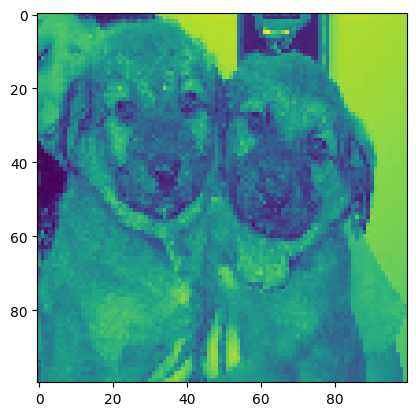

In [ ]:
#Peek a boo! I cannot tell if color or NOT
peek= random.randint(0, len(X_pickle))
plt.imshow(X_pickle[peek, :])
plt.show()

##Define the Model (CNN in Keras)-on a limited population

In [ ]:
#Original file parameters: +24K images of 100x100 grayscale pics
print(X_pickle.shape)
print(y_pickle.shape)

(24946, 100, 100, 1)
(24946,)


In [ ]:
# Split the data up in train and test sets-and use .10 for testing and .9 for training the model
X_train, X_test, y_train, y_test = train_test_split(X_pickle, y_pickle, test_size=0.10, random_state=42)

In [ ]:
#Confirm the allocation and note the 1 at the end-looks like grayscale.
print(X_train.shape)
print(y_train.shape)

(22451, 100, 100, 1)
(22451,)


In [ ]:
#Reset the RGB (red, green, blue) values to zero or 1, IF ANY-based on the last parameter 1 above it is greayscale, but I can't tell
X_train = X_train/255
X_test = X_test/255

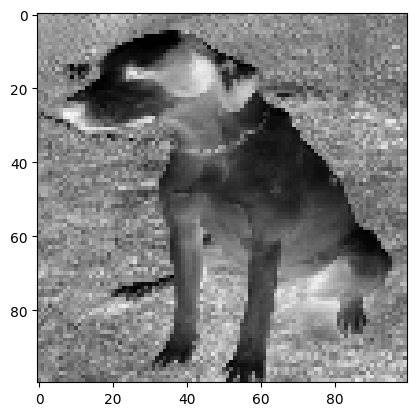

In [ ]:
#display a test image in grayscale
plt.imshow(X_train[0],cmap=plt.cm.gray_r)
plt.show()

###Define the model, input, & Convolutinal Layers

In [ ]:
#Define the model, input, and multiple layers incuding output.

model = Sequential()

# Define input & first hidden layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 1), name = "hidden1" ))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Add second hidden layer
model.add(Conv2D(64, (3, 3), activation='relu', name = "hidden2"))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten data to 1D to be used in output layer
model.add(Flatten())

#Define output layer
model.add(Dense(10, activation = 'softmax', name = "output"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Compile the Model

In [ ]:
model.compile(
    optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'],)

##Fit the Model, summarized output, plot and convert dimensionality.

In [ ]:
model.fit(X_train, y_train, epochs=4) ;

Epoch 1/4
702/702 ━━━━━━━━━━━━━━━━━━━━ 548s 778ms/step - accuracy: 0.6066 - loss: 0.6702
Epoch 2/4
702/702 ━━━━━━━━━━━━━━━━━━━━ 575s 798ms/step - accuracy: 0.7550 - loss: 0.5059
Epoch 3/4
702/702 ━━━━━━━━━━━━━━━━━━━━ 546s 775ms/step - accuracy: 0.7883 - loss: 0.4483
Epoch 4/4
702/702 ━━━━━━━━━━━━━━━━━━━━ 558s 769ms/step - accuracy: 0.8167 - loss: 0.4057


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden1 (Conv2D)                     │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Conv2D)                     │ (None, 47, 47, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │         338,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,128,416 (4.30 MB)

 Trainable params: 376,138 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 752,278 (2.87 MB)

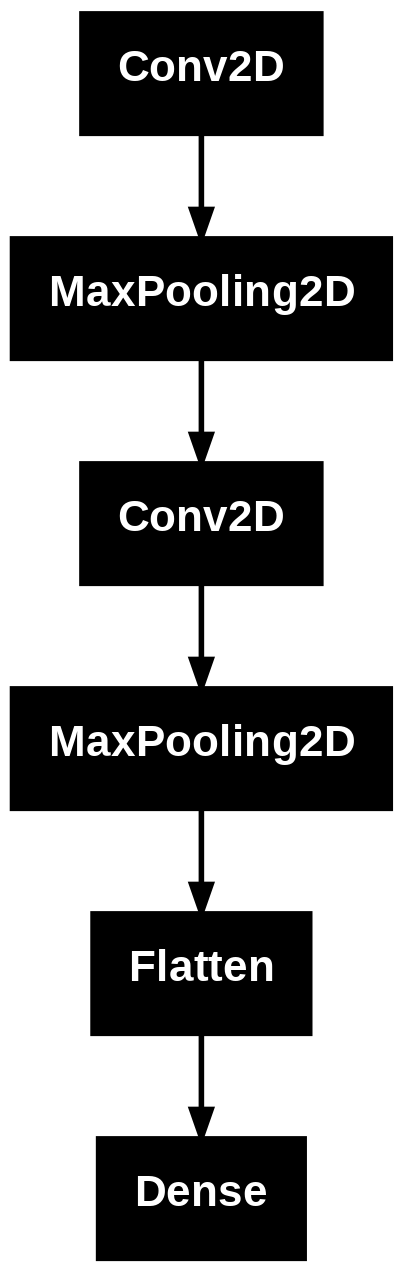

In [ ]:
plot_model(model)

In [ ]:
#Change the test set to 4D

X_test2 = X_test.reshape( X_test.shape + (1,) )


##Evaluate the Model

In [ ]:
val_loss, val_acc = model.evaluate(X_test2, y_test)
print(val_loss)
print(val_acc)

78/78 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.7978 - loss: 0.4444
0.4480591118335724
0.7995991706848145


#Employ the Model-Use to predict

In [ ]:
predictions = model.predict(X_test2)
print(predictions[2300])

78/78 ━━━━━━━━━━━━━━━━━━━━ 16s 209ms/step
[3.6704388e-01 6.3295615e-01 2.5687343e-13 2.6780038e-13 2.7151740e-13
 2.5554859e-13 2.6342234e-13 2.7222316e-13 2.4194164e-13 2.5718227e-13]


In [ ]:
predictions.shape

(2495, 10)

0: 36.70
1: 63.30
2: 0.00
3: 0.00
4: 0.00
5: 0.00
6: 0.00
7: 0.00
8: 0.00
9: 0.00
1
0


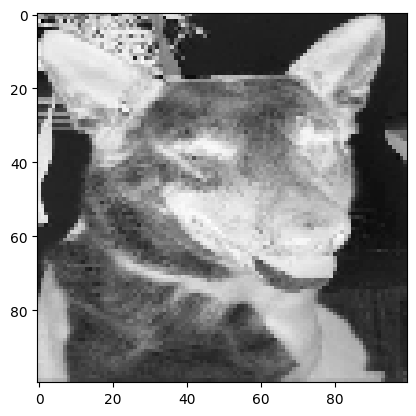

In [ ]:
# pick any image from 0 to 2495-1
i = 2300

for k, x in enumerate(predictions[i]*100):
  print(f"{k}: {x:.2f}")
print(np.argmax(predictions[i]))
print(y_test[i])
plt.imshow(X_test[i], cmap=plt.cm.gray_r)
plt.show()


In [ ]:
#shape to dictionary
results = pd.DataFrame( {
  "Species Prediction": y_test,
  "Dog %": predictions[:,0],
  "Cat %": predictions[:,1],
} )
print(results.head(i))

      Species Prediction     Dog %     Cat %
0                      0  0.756560  0.243440
1                      1  0.257005  0.742995
2                      1  0.033543  0.966457
3                      1  0.039630  0.960370
4                      0  0.546960  0.453041
...                  ...       ...       ...
2295                   1  0.466675  0.533325
2296                   0  0.953385  0.046615
2297                   0  0.975000  0.025000
2298                   1  0.653248  0.346752
2299                   1  0.260740  0.739260

[2300 rows x 3 columns]


## Final image of dog located here: 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

In [ ]:
!curl -O 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60603  100 60603    0     0   237k      0 --:--:-- --:--:-- --:--:--  237k
